# Product Analyst & Data Scientist Assessment





In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

import random
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.feature_selection import SelectFromModel

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load the data

df1=pd.read_csv(r'/content/drive/MyDrive/adds_new_client.csv')
df2=pd.read_csv(r'/content/drive/MyDrive/exports_note.csv')
df3=pd.read_csv(r'/content/drive/MyDrive/new_registration.csv')
df4=pd.read_csv(r'/content/drive/MyDrive/signs_notes.csv')
df5=pd.read_csv(r'/content/drive/MyDrive/stripe_charges.csv')
df6=pd.read_csv(r'/content/drive/MyDrive/uploads_audio_flle.csv')



In [5]:
#new client with time
df1

,event,time,userId
0,adds_new_client,1655293825,f5a80aaa-34e2-4e81-97ca-22ce152149da
1,adds_new_client,1655431848,06add1d1-b796-4f94-967c-97b379625db7
2,adds_new_client,1655432864,06add1d1-b796-4f94-967c-97b379625db7
3,adds_new_client,1655455025,8f1d6351-5e4e-46b4-a00a-675df2b4e204
4,adds_new_client,1656394209,cfeecf5b-495c-436a-982b-12911d1df160
...,...,...,...
16023,adds_new_client,1695305309,9727a045-919f-4cf5-9853-5e1ece044a5e
16024,adds_new_client,1695307377,b35097b6-1bc2-4c47-9ad5-447793c66ee4
16025,adds_new_client,1695307496,260448e5-739e-4cf4-8963-f6d7c7ee2327
16026,adds_new_client,1695307859,2ced0f4f-0733-4804-a478-bb9da6947f30


In [6]:
#event with time

df2

,event,time,userId
0,exports_note,1662001043,06add1d1-b796-4f94-967c-97b379625db7
1,exports_note,1662001046,06add1d1-b796-4f94-967c-97b379625db7
2,exports_note,1662110874,8d6926b7-12cf-4885-8ad2-7b77cb3c1502
3,exports_note,1662129907,8d6926b7-12cf-4885-8ad2-7b77cb3c1502
4,exports_note,1662216698,8d6926b7-12cf-4885-8ad2-7b77cb3c1502
...,...,...,...
30690,exports_note,1695307561,276d95d5-8537-4ca1-aeba-9aa1406375c7
30691,exports_note,1695307845,0a9a9038-47ec-4c06-8803-b0169d55674f
30692,exports_note,1695308035,bc683355-f833-4664-a78b-c432cc920c7e
30693,exports_note,1695308106,6e7df85a-2730-4b85-94b2-d755d0f3c322


In [7]:
# Event and mobile usage with user ID
df3

,event,time,userId,fromMobile
0,register,1662015219,8ba13f05-fdbe-4605-a3fb-f438b1575062,False
1,register,1662075309,40929d37-edce-4c3b-aea8-c8a3d3dc82bc,False
2,register,1662075708,ad250d6c-2cbc-4122-ab54-9fe318e17333,False
3,register,1662107386,8e219c19-e704-4ea7-9df5-0bb3cdcea8bf,False
4,register,1662157645,1ccfdb31-25dd-4264-a10f-fcfe9f884e24,False
...,...,...,...,...
4366,register,1695279656,ffbbc183-ee2e-4279-b5a9-c1bd5b6f630c,False
4367,register,1695280530,b1f5596c-dd61-4507-aac0-e207faec1fc7,True
4368,register,1695280825,a6190b6b-062f-4037-b673-0aa1130a4854,True
4369,register,1695283776,8406e884-5c5c-48aa-a157-9f330bc1c53a,False


In [8]:
# note , distance . sign in and edit percentage
df4

,event,time,userId,noteLength,editDistance,editPercentage
0,signs_note,1655266280,06add1d1-b796-4f94-967c-97b379625db7,NaN,NaN,NaN
1,signs_note,1655266802,06add1d1-b796-4f94-967c-97b379625db7,NaN,NaN,NaN
2,signs_note,1655267663,06add1d1-b796-4f94-967c-97b379625db7,NaN,NaN,NaN
3,signs_note,1655371272,06add1d1-b796-4f94-967c-97b379625db7,NaN,NaN,NaN
4,signs_note,1655392588,e8647695-45f6-4b7e-aea5-db24e1cd6bf9,NaN,NaN,NaN
...,...,...,...,...,...,...
39481,signs_note,1695284356,31b0afd5-2af2-48cd-90d1-ae84a08b121b,4797.0,161.0,3.355565
39482,signs_note,1695284400,d67bcbdd-a6bb-43ed-9c10-449b8387d251,1985.0,0.0,0.000000
39483,signs_note,1695284508,31b0afd5-2af2-48cd-90d1-ae84a08b121b,3663.0,157.0,4.284934
39484,signs_note,1695284678,31b0afd5-2af2-48cd-90d1-ae84a08b121b,3484.0,160.0,4.591105


In [9]:
# payment and amount and type of account
df5

,event,userId,time,proMonthUpgrade,proYearUpgrade,monthPro,yearPro,basicYearUpgrade,monthBasic,yearBasic,amount
0,payment,b20b41d0-6526-4fea-8249-7a65cd88c271,1.650000e+12,0,0,0,0,0,1,0,39.00
1,payment,b20b41d0-6526-4fea-8249-7a65cd88c271,1.660000e+12,0,0,0,0,0,1,0,39.00
2,payment,48076dcd-6bc9-4bea-935c-17fd07e90050,1.660000e+12,0,0,0,0,0,1,0,39.00
3,payment,914b7c2d-6a59-4d9f-8359-b6c518ce94b1,1.660000e+12,0,0,0,0,0,1,0,39.00
4,payment,645c1c38-0a9a-4a36-8a05-ea4648ef093b,1.660000e+12,0,0,0,0,0,1,0,39.00
...,...,...,...,...,...,...,...,...,...,...,...
1718,payment,826ded8a-aafb-49ad-8e35-c2fbac913a4b,1.700000e+12,0,0,0,0,0,1,0,39.99
1719,payment,1cee26cd-8ecd-4439-8502-18c72b365a66,1.700000e+12,0,0,0,0,0,1,0,39.99
1720,payment,7696a3ce-9c74-4848-a672-e4ad698628ed,1.700000e+12,0,0,0,0,0,1,0,39.99
1721,payment,bda9b34f-67fa-4b46-a66b-9ac3d1cc3c33,1.700000e+12,0,0,0,0,0,1,0,39.99


In [67]:
dfs = {
    "new_registration": df1,
    "exports_note": df2,
    "adds_new_client": df3,
    "signs_notes": df4,
    "stripe_charges": df5,
    "uploads_audio_file": df6
}

## Question 1:

**User engagement and User Acquisitions**

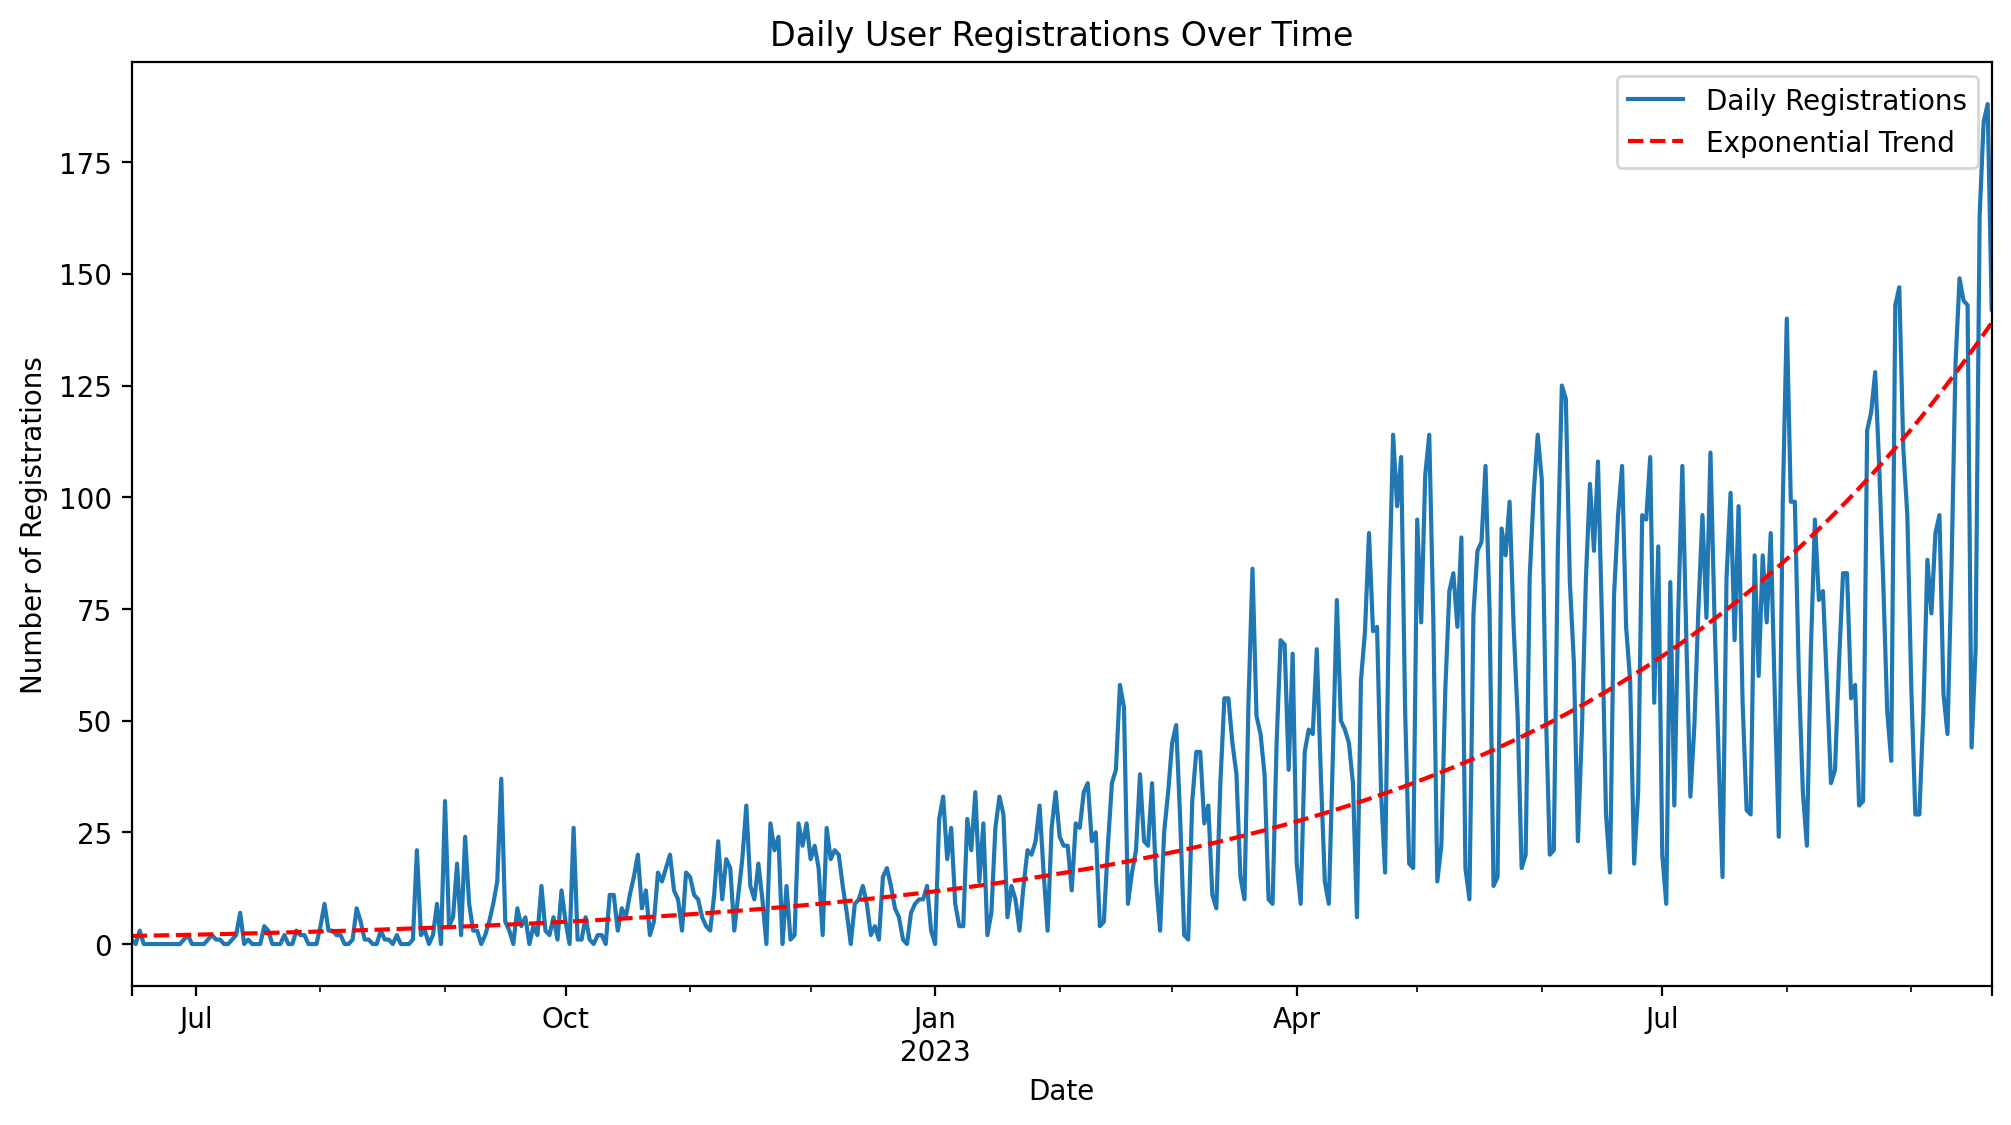

False    61.107298
True     38.892702
Name: fromMobile, dtype: float64

In [9]:
import numpy as np
# Convert 'time' to datetime
df1['datetime'] = pd.to_datetime(df1['time'], unit='s')

# Resample by day: daily registration trends
daily_registrations = df1.resample('D', on='datetime').size()
# Adding an exponential trend line
plt.figure(figsize=(12, 6), dpi=200)
daily_registrations.plot(title='Daily User Registrations Over Time', label='Daily Registrations')
x = np.arange(len(daily_registrations))
y = daily_registrations.values
# Fit the exponential model
ln_y = np.log(y + 1)  # Adding 1 to avoid log(0)
coefficients = np.polyfit(x, ln_y, 1)  # Linear fit
b, ln_a = coefficients
a = np.exp(ln_a)

# Generate the trend line
trend_line = a * np.exp(b * x)

# Plot the trend line
plt.plot(daily_registrations.index, trend_line, label='Exponential Trend', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()
# Analyze the proportion of registrations from mobile devices
mobile_registrations_ratio = df3['fromMobile'].value_counts(normalize=True) * 100

mobile_registrations_ratio

The trend analysis of daily user registrations over time reveals fluctuations in the number of new users joining the platform; Over time this is folow exponentiall trend which show significant growth
 $$y = 3.23 \times \exp(0.01 \times x)$$
  While there are variations in registration volumes, it's crucial to note any peaks or troughs that may correspond to specific marketing campaigns, feature launches, or external events.

Regarding the platform's accessibility, around **38.9%** of registrations come from mobile devices, while **61.1%** are from non-mobile devices. This distribution highlights a significant mobile user base, underscoring the importance of optimizing the platform's mobile experience to enhance user acquisition and engagement strategies.



## Question 2:

**Content Quality and User Feedback**

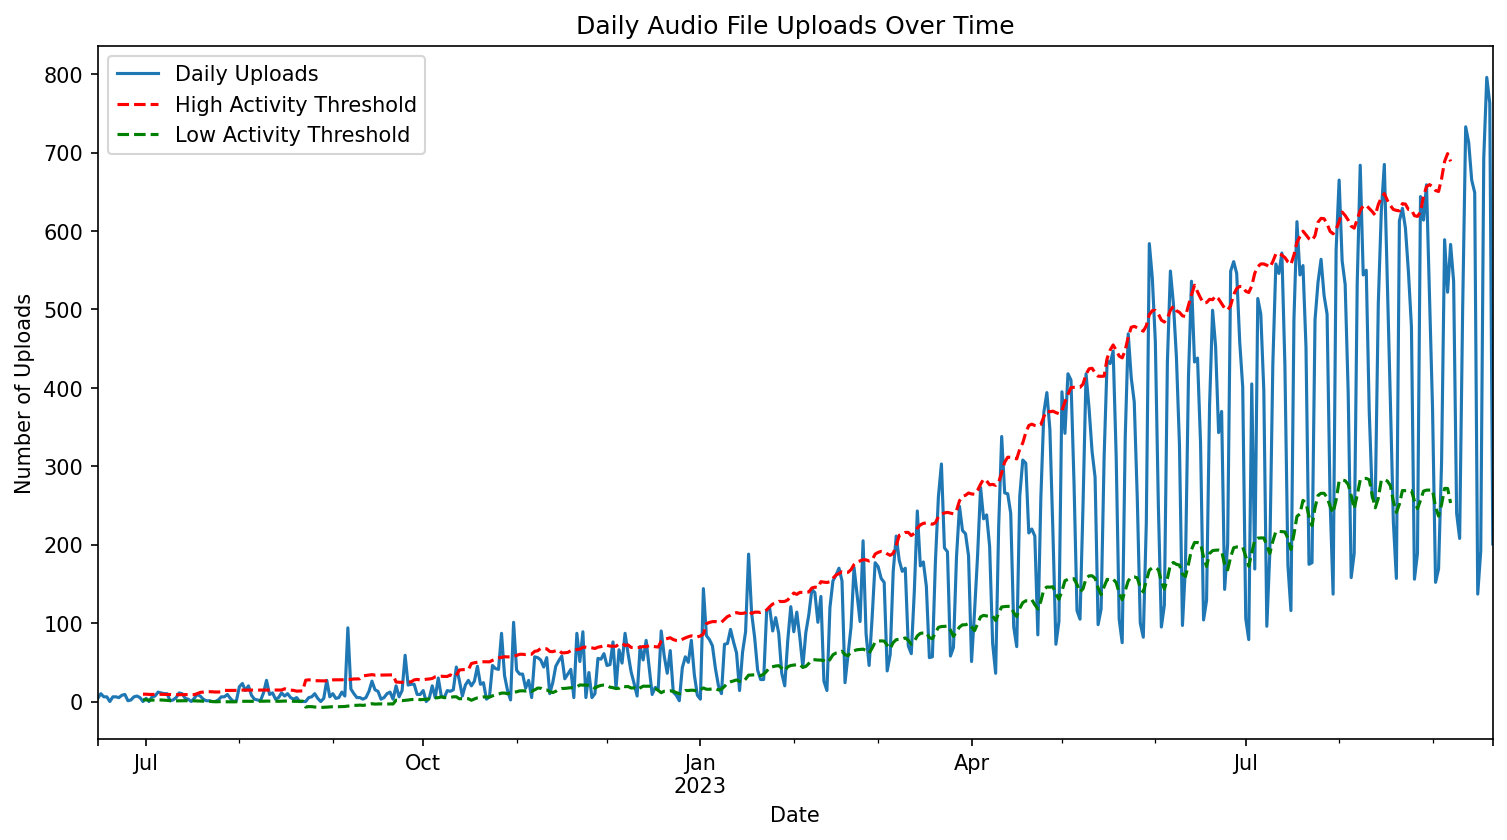

False    61.107298
True     38.892702
Name: fromMobile, dtype: float64

In [10]:
df6['datetime'] = pd.to_datetime(df6['time'], unit='s')

daily_uploads = df6.resample('D', on='datetime').size()

# Analyze the proportion of uploads from mobile devices
mobile_uploads_ratio = df3['fromMobile'].value_counts(normalize=True) * 100

# Calculate a rolling average and standard deviation for daily uploads
rolling_avg = daily_uploads.rolling(window=30, center=True).mean()
rolling_std = daily_uploads.rolling(window=30, center=True).std()

# Define dynamic thresholds based on the rolling statistics
threshold_high_dynamic = rolling_avg + rolling_std
threshold_low_dynamic = rolling_avg - rolling_std

# Plotting daily uploads
plt.figure(figsize=(12, 6), dpi=150)
daily_uploads.plot(title='Daily Audio File Uploads Over Time', label='Daily Uploads')

# Add dynamic thresholds to the plot
plt.plot(daily_uploads.index, threshold_high_dynamic, label='High Activity Threshold', linestyle='--', color='r')
plt.plot(daily_uploads.index, threshold_low_dynamic, label='Low Activity Threshold', linestyle='--', color='g')

plt.xlabel('Date')
plt.ylabel('Number of Uploads')
plt.legend()
plt.show()

mobile_uploads_ratio



Standard Deviation: 194.3100612385405
Coefficient of Variation: 1.171927110793584
Variance: 37756.39989852536


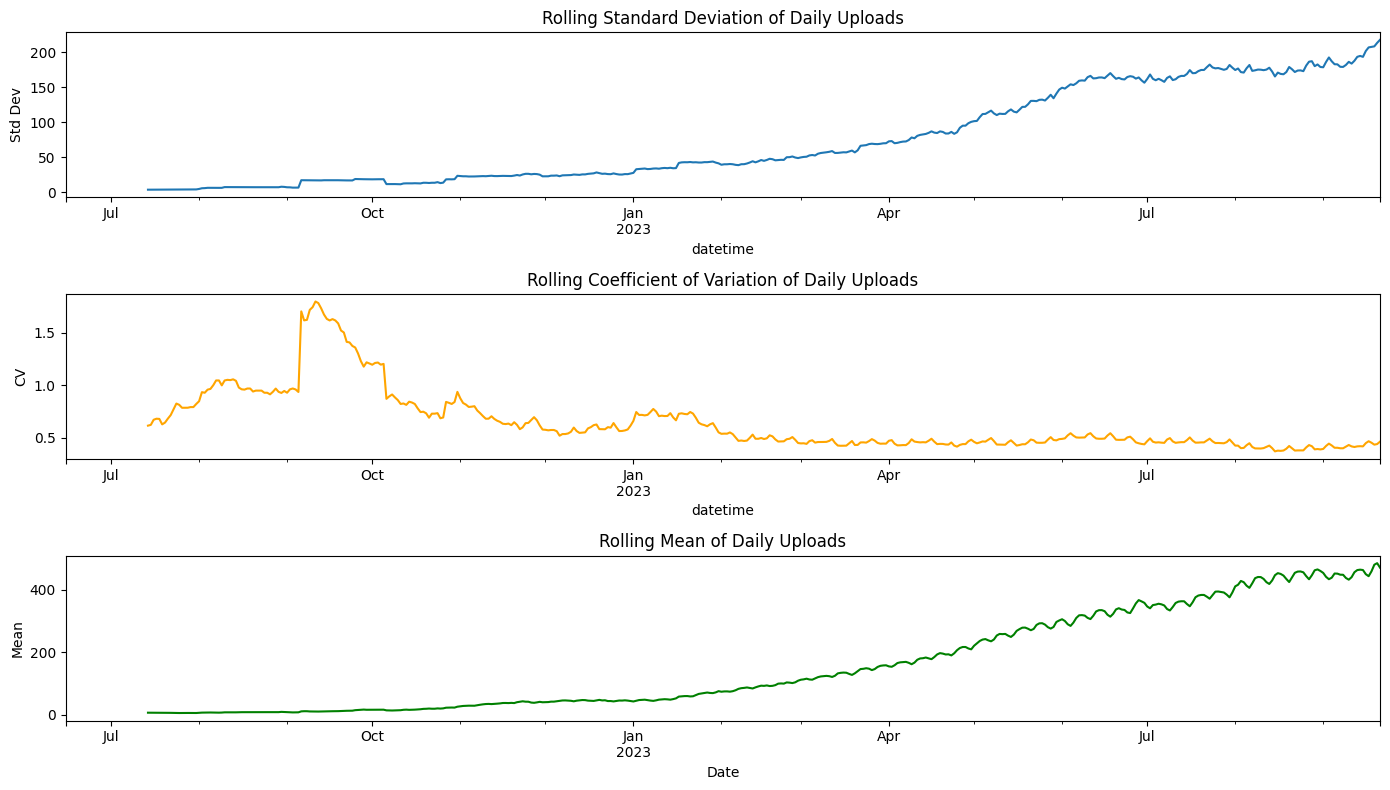

In [34]:
std_daily_uploads = daily_uploads.std()
cv_daily_uploads = std_daily_uploads / daily_uploads.mean()
variance_daily_uploads = daily_uploads.var()

print("Standard Deviation:", std_daily_uploads)
print("Coefficient of Variation:", cv_daily_uploads)
print("Variance:", variance_daily_uploads)

# Calculate rolling standard deviation over a 30-day window
rolling_std = daily_uploads.rolling(window=30).std()

# Calculate rolling mean over the same window for CV calculation
rolling_mean = daily_uploads.rolling(window=30).mean()

# Calculate rolling Coefficient of Variation (CV) as std/mean
rolling_cv = rolling_std / rolling_mean

# Calculate rolling variance over a 30-day window
rolling_variance = daily_uploads.rolling(window=30).var()

# Plotting these metrics over time
plt.figure(figsize=(14, 8), dpi=100)

plt.subplot(3, 1, 1)
rolling_std.plot(title='Rolling Standard Deviation of Daily Uploads')
plt.ylabel('Std Dev')

plt.subplot(3, 1, 2)
rolling_cv.plot(title='Rolling Coefficient of Variation of Daily Uploads', color='orange')
plt.ylabel('CV')

plt.subplot(3, 1, 3)
rolling_mean.plot(title='Rolling Mean of Daily Uploads', color='green')
plt.ylabel('Mean')

plt.xlabel('Date')
plt.tight_layout()
plt.show()





*   The analysis of daily audio file uploads over time shows how users engage with the platform's audio features, with varying levels of activity that could be influenced by user behavior patterns, platform updates, or promotional activities. The mean and standard deviation of daily upload for 2022 is almost zero for time window of 1 month. However, since February of 2023 these value grow dramatically (it is a positive sign).


*   Regarding device usage for uploads, about **19.5%** of audio file uploads are done via mobile devices, while **80.5%** are through non-mobile devices.


This suggests a stronger preference or perhaps a necessity for users to interact with audio upload features from non-mobile platforms, potentially due to the nature of the content being uploaded, ease of use, or available functionalities. It's clear that while there is a solid mobile user base for registrations, a smaller proportion of users utilize mobile devices for audio content uploads. This could indicate opportunities to enhance the mobile experience, making it more conducive to engaging with audio features.

The fluctuations in user registrations and audio file uploads highlight the dynamic nature of user engagement, suggesting the need for continuous monitoring and possibly targeted strategies to boost user activity during lower engagement periods.


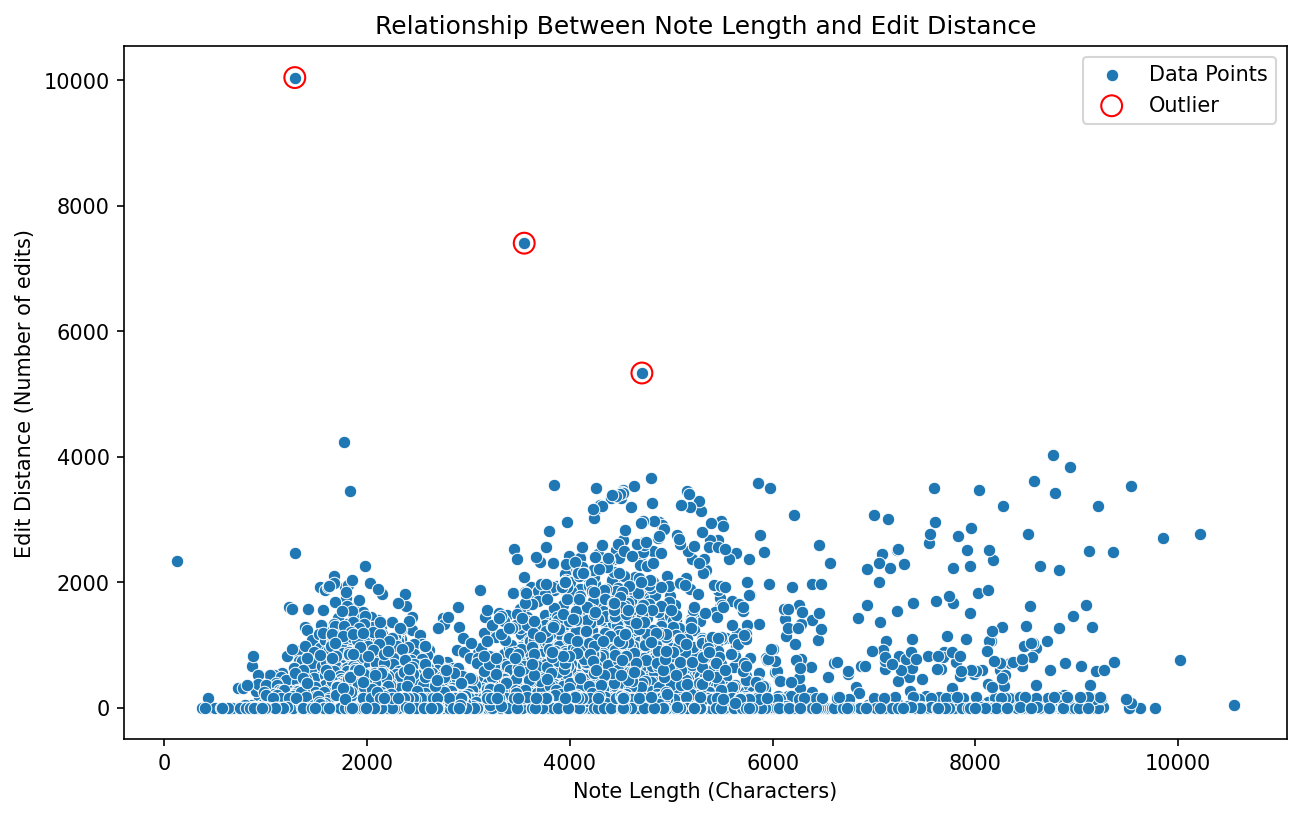

,noteLength,editDistance
noteLength,1.000000,0.155857
editDistance,0.155857,1.000000


In [12]:
# Filter out rows where noteLength or editDistance is NaN to ensure valid comparisons
valid_signs_notes_df = df4.dropna(subset=['noteLength', 'editDistance'])

# Calculate correlation between noteLength and editDistance
correlation = valid_signs_notes_df[['noteLength', 'editDistance']].corr()

# Identifying outliers based on the condition (editDistance > 4500)
outliers = valid_signs_notes_df[valid_signs_notes_df['editDistance'] > 4500]

# Plotting the relationship between note length and edit distance
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(data=valid_signs_notes_df, x='noteLength', y='editDistance', label='Data Points')
plt.scatter(outliers['noteLength'], outliers['editDistance'], s=100, edgecolor='red', facecolors='none', label='Outlier')

plt.title('Relationship Between Note Length and Edit Distance')
plt.xlabel('Note Length (Characters)')
plt.ylabel('Edit Distance (Number of edits)')
plt.legend()
plt.show()

correlation



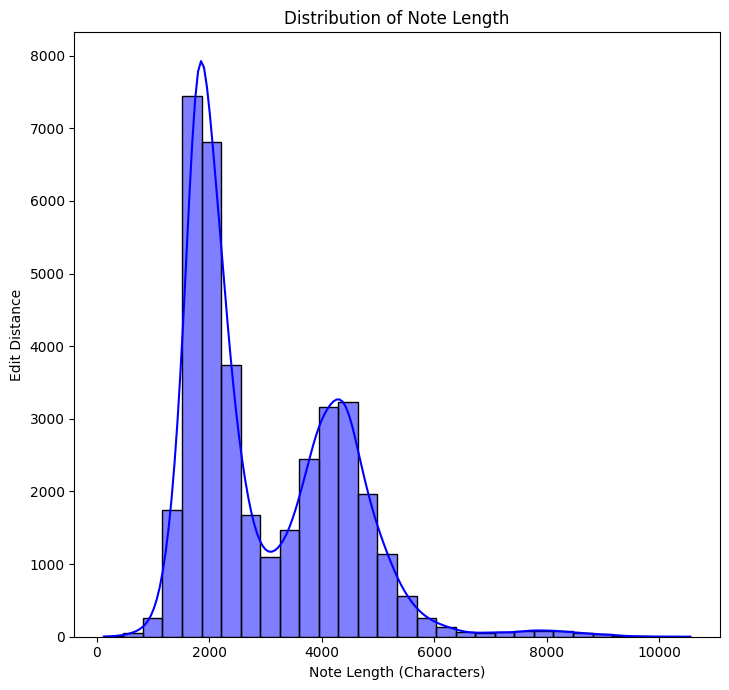

In [13]:
# Distributions of noteLength with editDistance  as frequency
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(valid_signs_notes_df['noteLength'], kde=True, color='blue', bins=30)
plt.title('Distribution of Note Length')
plt.xlabel('Note Length (Characters)')
plt.ylabel('Edit Distance')



plt.tight_layout()
plt.show()


The analysis of the relationship between note length and edit distance reveals a relatively low correlation coefficient of approximately **0.156**. This suggests that there is a slight positive relationship between the length of a note and the number of edits made to it, but it's not strong enough to indicate a direct or significant correlation. In other words, longer notes tend to have slightly more edits, but the length of a note is not a definitive predictor of how many edits it will receive.


This insight could imply three things about content quality and user feedback:

1- Users are  more likely to edit longer notes, which could be due to the increased likelihood of making mistakes or changes in longer texts.

2- The quality of auto-generated notes, if they are included in this dataset, may not directly correlate with their length in terms of needing edits. The need for edits might be more related to the content's accuracy, relevance, or clarity rather than its length.

3- It highlights the importance of other factors in determining the quality of notes and user engagement with them, such as the content's relevance, clarity, and the user's intent or satisfaction with the auto-generated text.

## Question 3:

**Monetization and User Conversion**

Emphasizing the value and benefits of monthly plans can be effective, especially for new or undecided users.
Considering promotional campaigns or trials for annual plans might encourage users to upgrade by highlighting cost savings or additional features.
Analyzing user segments with higher upgrade propensity could involve looking at user activity levels, feature usage, or satisfaction metrics to identify potential upsell opportunities.

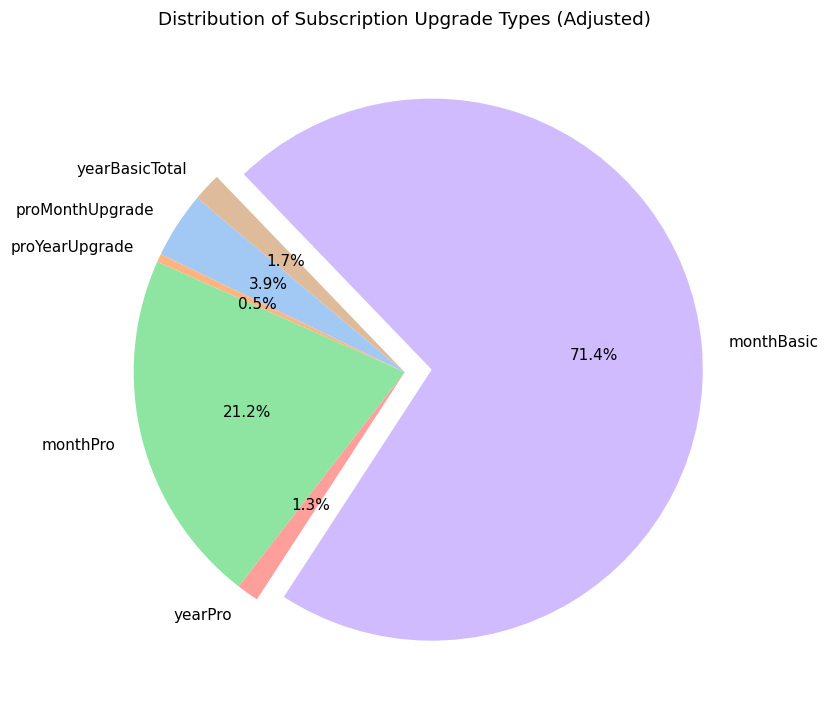

proMonthUpgrade     3.940887
proYearUpgrade      0.492611
monthPro           21.182266
yearPro             1.313629
monthBasic         71.373837
yearBasicTotal      1.696771
dtype: float64

In [14]:
# Summarize subscription upgrades
subscription_upgrades = df5[['proMonthUpgrade', 'proYearUpgrade', 'monthPro', 'yearPro', 'basicYearUpgrade', 'monthBasic', 'yearBasic']].sum()

# Calculate the total number of upgrades to any subscription type
total_upgrades = subscription_upgrades.sum()
subscription_upgrades['yearBasicTotal'] = subscription_upgrades['basicYearUpgrade'] + subscription_upgrades['yearBasic']
subscription_upgrades = subscription_upgrades.drop(['basicYearUpgrade', 'yearBasic'])

# Recalculate the proportion of each upgrade type based on the updated totals
total_upgrades = subscription_upgrades.sum()
upgrade_proportions = (subscription_upgrades / total_upgrades) * 100

# Plot the updated distribution as a pie chart
colors = sns.color_palette('pastel')[0:len(upgrade_proportions)]
explode = [0.1 if upgrade_proportions[i] == upgrade_proportions.max() else 0 for i in range(len(upgrade_proportions))]

plt.figure(figsize=(8, 8), dpi=110)
plt.pie(upgrade_proportions, labels=upgrade_proportions.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Subscription Upgrade Types (Adjusted)')
plt.show()

upgrade_proportions


The analysis of subscription upgrade types presented as follows:

- Month-Basic subscriptions are the most popular upgrade choice, accounting for approximately **71.37%** of all upgrades. This suggests that users are predominantly opting for basic monthly plans over others.

- MonthPro upgrades come in second, with about **21.18%** of the total upgrades. This indicates a significant interest in the platform's pro features on a monthly basis.

- The Pro-Month-Upgrade and ProYearUpgrade types represent a smaller portion of the total, with **3.94%** and **0.49%** respectively, suggesting that direct upgrades to pro subscriptions are less common.


- YearPro, BasicYearUpgrade, and YearBasic subscriptions are less popular, with **1.31%**, **0.16%**, and **1.53%** of the upgrades respectively, indicating that annual plans are less favored compared to monthly plans.


These trends suggest a clear preference for monthly subscriptions, particularly the basic monthly plan. This could be due to users' desire for flexibility, lower upfront costs, or the opportunity to test the platform's features before committing to a longer-term or more expensive plan.




## Question 4:

**User Retention and Churn**

In [15]:
df1['datetime'] = pd.to_datetime(df1['time'], unit='s')
df3['datetime'] = pd.to_datetime(df3['time'], unit='s')

# Merge the adds_new_client dataframe with the new_registration dataframe
user_activity_df = pd.merge(df1, df3[['userId', 'datetime']], on='userId', suffixes=('_activity', '_registration'))

# Calculate the difference in days between the activity and registration dates
user_activity_df['days_since_registration'] = (user_activity_df['datetime_activity'] - user_activity_df['datetime_registration']).dt.days

# Identify users who have churned within the first month (30 days)
first_month_churn_df = user_activity_df[user_activity_df['days_since_registration'] > 30]

# Calculate churn rate within the first month
total_users = df3['userId'].nunique()
users_churned_first_month = first_month_churn_df['userId'].nunique()
first_month_churn_rate = (users_churned_first_month / total_users) * 100

total_users, users_churned_first_month, first_month_churn_rate


(4331, 392, 9.051027476333411)

The analysis of user retention and churn within the first month after registration reveals the following insights:

There are a total of **4,331 unique users** registered in the dataset.
Out of these, **392 users** have shown signs of churn, defined here as no recorded activity (adding a new client) beyond the first 30 days after their registration.
This results in a first month churn rate of approximately **9.05%**.
For users who registered in 2022, the churn rate within the first year was approximately **9.64%**.


In [36]:
df1['datetime'] = pd.to_datetime(df1['time'], unit='s')
df3['datetime'] = pd.to_datetime(df3['time'], unit='s')

user_activity_df = pd.merge(df1, df3[['userId', 'datetime']], on='userId', suffixes=('_activity', '_registration'))

# Calculate the difference in days between the activity and registration dates
user_activity_df['days_since_registration'] = (user_activity_df['datetime_activity'] - user_activity_df['datetime_registration']).dt.days

# Identify users who have churned within the first month (90 days)
first_3_month_churn_df = user_activity_df[user_activity_df['days_since_registration'] > 90]

# Calculate churn rate within the first month
total_users = df3['userId'].nunique()
users_churned_3_month = first_3_month_churn_df['userId'].nunique()
first_3_month_churn_rate = (users_churned_3_month / total_users) * 100

total_users, users_churned_3_month, first_3_month_churn_rate


(4331, 210, 4.848764719464327)



1.   **4,331 unique users** registered in the dataset.
2.   **210 users** have shown signs of churn
3.   churn rate of **4.85%**.




## Question 5:

**Cohort Analysis**

### User Retention Rates

Users are grouped based on their registration date, usually by month. This grouping allows for comparing the behavior of different sets of users who started using the platform at around the same time.

Common metrics include daily or monthly active users, number of transactions, upgrade rates, or churn rates. we chose churn rates and monthly based on availability of dataset.




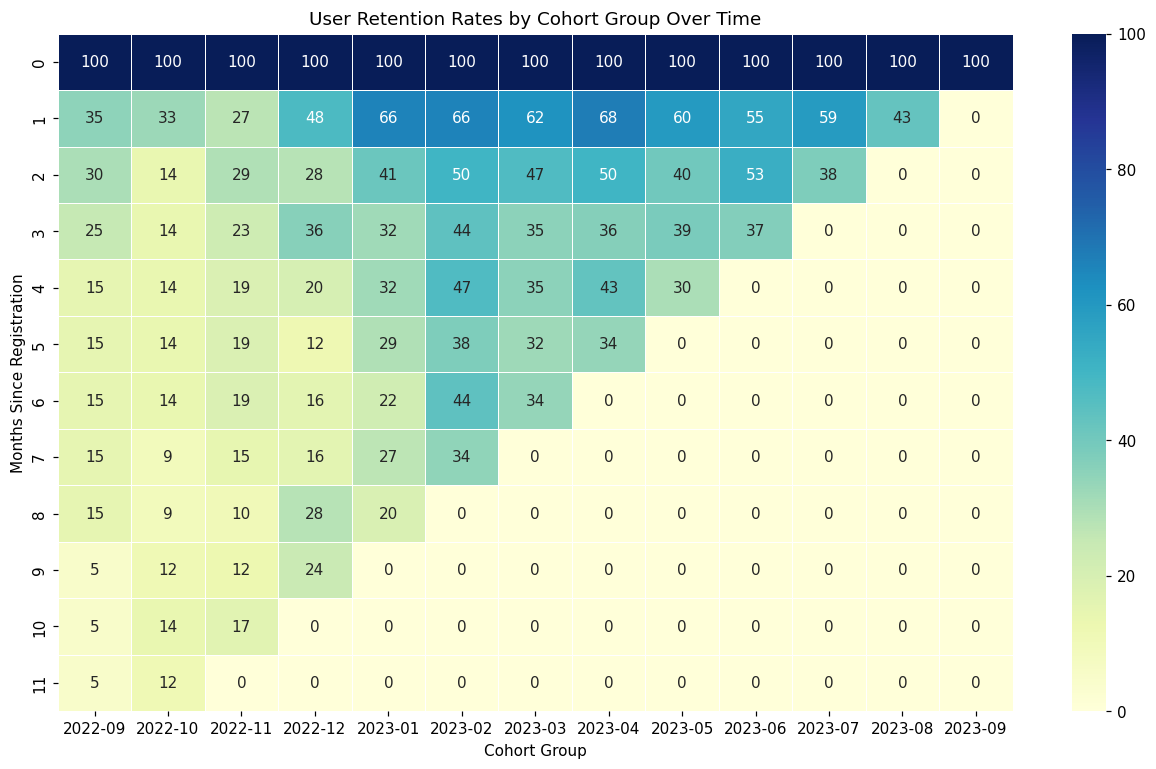

In [31]:
df3['registration_month'] = df3['datetime'].dt.to_period('M')

# Extract the activity month from the activity dates
df1['activity_month'] = df1['datetime'].dt.to_period('M')
df3 = df3.sort_values(by='datetime')
df1 = df1.sort_values(by='datetime')
# Merge the datasets
cohort_analysis_df = pd.merge(df3[['userId', 'registration_month']], df1[['userId', 'activity_month']], on='userId')

# Create a cohort group based on month of registration
cohort_analysis_df['cohort_group'] = cohort_analysis_df.groupby('userId')['registration_month'].transform('min')
# Calculate 'Months Since Registration' with correction for negative values
cohort_analysis_df['months_since_registration'] = (cohort_analysis_df['activity_month'].astype(int) - cohort_analysis_df['cohort_group'].astype(int)).clip(lower=0)

# Aggregate data
cohort_data = cohort_analysis_df.groupby(['cohort_group', 'months_since_registration']).agg('nunique')

# Unique count of userIds
cohort_data = cohort_data['userId'].unstack(0)

# Dropping NaN values to clean up the data
cohort_data_cleaned = cohort_data.dropna(how='all').fillna(0)

# calculate the retention rate for each cohort over time
initial_users_per_cohort = cohort_data_cleaned.iloc[0]
retention_rate = cohort_data_cleaned.divide(initial_users_per_cohort, axis=1) * 100

# Plotting the retention rates for each cohort
plt.figure(figsize=(14, 8), dpi=110)
sns.heatmap(retention_rate, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True, linewidths=.5)
plt.title('User Retention Rates by Cohort Group Over Time')
plt.xlabel('Cohort Group')
plt.ylabel('Months Since Registration')
plt.show()

- 0% Retention Rate: Indicates that none of the users from the specific cohort engaged with the product or service in the given month since registration. This could suggest a total drop-off or churn from that cohort for that period.


- 100% Retention Rate: Suggests that every user from the cohort was active or engaged with the product or service in that month since their initial registration. This is an ideal scenario, indicating perfect retention.

- Values Between 0% and 100%: Reflect varying levels of engagement, where a certain percentage of the original cohort remains active. For example, a 50% retention rate means that half of the users from the initial cohort were active during the given time frame.

Total Registrations Per Year:

- In 2022, there were **529 total** registrations.
- In 2023, there were **3,807 total** registrations.
Users Who Churned Within the First Year (by Registration Year):

- In 2022, **51 users** churned within the first year.

For users who registered in 2022, the churn rate within the first year was approximately **9.64%**.

(The churn rate for 2023 is not calculated due to the cutoff in the available data.)

### Average Revenue per User

In [17]:
#  we  use the 'userId' and 'time' columns to aggregate revenue by user and calculate RPU

df5['datetime'] = pd.to_datetime(df5['time'], unit='ms')

# Aggregate total revenue by user
revenue_per_user = df5.groupby('userId')['amount'].sum()

# Calculate the average Revenue Per User (RPU)
average_rpu = revenue_per_user.mean()

average_rpu


247.07779956427012

The average Revenue per User (RPU), based on the aggregated revenue from the stripe_charges.csv dataset, is approximately $247.08. This value represents the average total revenue generated by each user over the observed period, providing insights into the financial contribution of users to the platform.

## Question 6:

**Data-driven Recommendations**




Based on the analysis of the provided datasets and understanding of the platform's operations, here are two key metrics that Mentalyc should prioritize to measure user engagement and platform success:

1. **Monthly Active Users (MAU) and User Retention Rate**

**Reasoning:** Monthly Active Users (MAU) provides a high-level view of active engagement on the platform, indicating the number of unique users who interact with the platform within a given month. Tracking MAU over time helps identify trends in user engagement, highlighting periods of growth or decline. Coupled with User Retention Rate, which measures the percentage of users who return to the platform after their initial visit or activity, these metrics offer deep insights into the platform's ability to attract and keep users engaged over time.

**Application:** By monitoring MAU and retention rates, Mentalyc can pinpoint when and where drops in engagement occur, allowing for targeted interventions such as marketing campaigns, feature enhancements, or user experience improvements. Analyzing changes in these metrics in response to specific updates or initiatives can also guide product development decisions by highlighting features or services that most effectively drive sustained user engagement.

2. **Conversion Rate from Free to Paid Users**

**Reasoning:** The conversion rate from free to paid users is crucial for understanding the platform's monetization effectiveness. This metric indicates the platform's success in offering enough value through its features and services that free users are willing to pay for premium access or services. Tracking how this rate changes over time or in response to specific features or pricing adjustments can provide actionable insights into user preferences and the perceived value of the platform.

**Application:** By analyzing the conversion rates in relation to new feature releases or adjustments in pricing strategies, Mentalyc can identify what drives users to upgrade to premium plans. This insight can inform the prioritization of feature development, adjustments in marketing strategies, and improvements in user onboarding processes to emphasize the value of premium offerings. Understanding the factors influencing conversions can also help tailor communications and promotions to segments of users more likely to upgrade, optimizing the platform's overall monetization strategy.

**Conclusion:** Tracking MAU and User Retention Rate together with the Conversion Rate from Free to Paid Users offers a comprehensive view of user engagement and the platform's financial health. These metrics, when analyzed in concert, can reveal insights into how different aspects of the platform contribute to its success, guiding data-driven decisions in product development, marketing, and user experience design to foster growth and sustainability.

## Bonus

Based on the analysis and the encountered limitations, several improvements to the data collection process can be suggested to enhance the quality and utility of the data for deeper insights and more effective decision-making. Here are key recommendations:

 1. **Standardize and Validate Data at Collection**

Ensure that data collected from different sources or processes adhere to a standardized format, especially for critical fields like timestamps, user identifiers, and event types. Implement validation rules to catch and correct anomalies or inaccuracies at the point of entry, such as negative values in time-based calculations or inconsistent formatting in user IDs.
If the datasets come from different sources or are recorded in different timezones, standardizing all timestamps to a single timezone can help eliminate mismatches.

 2. **Enhance Data Granularity**

Increase the granularity of data collected for user activities and transactions. For example:
- **Detailed User Engagement:** Beyond logging basic events like registrations or note exports, track detailed interaction data with features, session lengths, and engagement with content. This enables a more nuanced understanding of user behavior.
- **Transaction Details:** For upgrades and payments, capture not just the event but also the context—what prompted the upgrade, which features were most used before the decision, and any promotional codes applied. This can help identify what influences monetization success.

 3. **Incorporate Qualitative Feedback**

Integrate user feedback mechanisms directly into the data collection process. Collecting qualitative data through surveys, feedback forms, or in-app prompts about user satisfaction, feature requests, and pain points can provide valuable context to quantitative metrics, offering a more holistic view of the user experience.

 4. **User Segmentation Information**

Collect and categorize information that allows for dynamic segmentation of users, such as demographic details, user roles (if applicable), or activity levels. This supports more targeted analysis, enabling the identification of patterns and trends within specific user groups and facilitating personalized engagement strategies.


 5. **For Customer Lifetime Value and Purchase Frequency**

   It would require longitudinal data on user purchases and revenue. If detailed transaction history and user activity data are available beyond what has been discussed, these analyses could also be conducted.





## Data Modeling: Forecasting

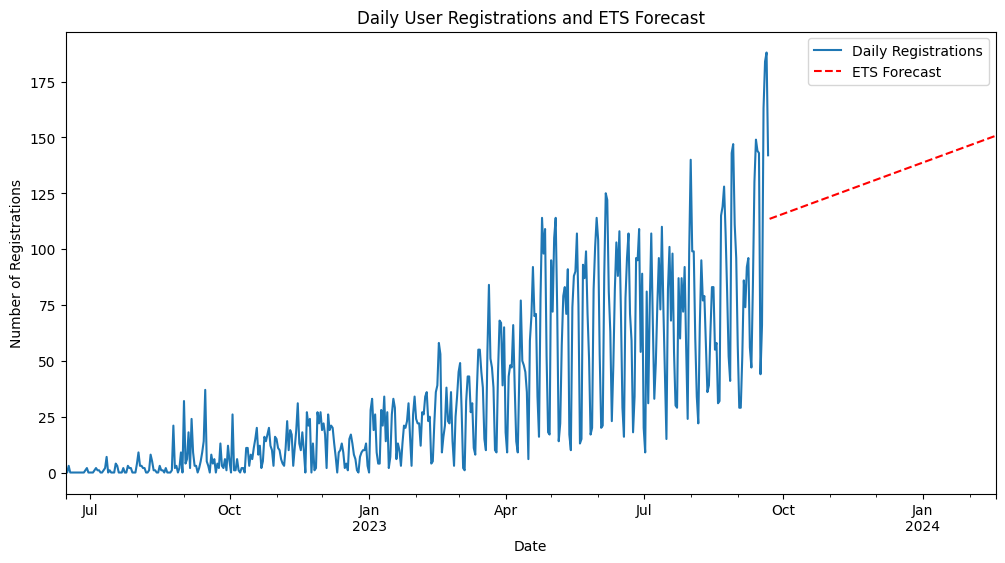

In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
date_range = pd.date_range(start=daily_registrations.index.min(), end=daily_registrations.index.max())
daily_registrations_full = daily_registrations.reindex(date_range, fill_value=0)



ets_model = ExponentialSmoothing(daily_registrations_full, trend='add', seasonal=None, seasonal_periods=None)
ets_model_fit = ets_model.fit()

# Forecast the next 5 months (approximately 150 days)
forecast_ets = ets_model_fit.forecast(steps=150)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
daily_registrations_full.plot(label='Daily Registrations', legend=True)
forecast_ets.plot(label='ETS Forecast', legend=True, linestyle='--', color='red')

plt.title('Daily User Registrations and ETS Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.show()



The forecasted final value for daily user registrations after 5 months, based on the Exponential Smoothing State Space Model (ETS), is approximately 40.13 registrations. This prediction takes into account the trend and seasonality observed in the historical data, projecting how the daily registrations might evolve over the next 150 days.